# Explore here

In [16]:
# Your code here
import pandas as pd


url = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"
df = pd.read_csv(url)

print(df.head())


  age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"
0  56;"housemaid";"married";"basic.4y";"no";"no";...                                                                                                                                                                          
1  57;"services";"married";"high.school";"unknown...                                                                                                                                                                          
2  37;"services";"married";"high.school";"no";"ye...                                                                                                                                                                          
3  40;"admin.";"married";"basic.6y";"no";"no";"no...                                                        

In [17]:
print (df.shape)

(41188, 1)


In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                        --------------  ----- 
 0   age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"  41188 non-null  object
dtypes: object(1)
memory usage: 321.9+ KB
None


In [19]:
# Añado separadores

url = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"
df = pd.read_csv(url, sep=';')  # Especificamos el separador

print(f"Número de columnas: {len(df.columns)}")
print(df.head())

Número de columnas: 21
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx 

In [20]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Vamos a verificar las dimensiones

De momento todas tienen el mismo numero de datos.


In [21]:
# Verificar dimensiones
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe(include='all').T)

Filas: 41188, Columnas: 21

Estadísticas descriptivas:
                  count unique                top   freq         mean  \
age             41188.0    NaN                NaN    NaN     40.02406   
job               41188     12             admin.  10422          NaN   
marital           41188      4            married  24928          NaN   
education         41188      8  university.degree  12168          NaN   
default           41188      3                 no  32588          NaN   
housing           41188      3                yes  21576          NaN   
loan              41188      3                 no  33950          NaN   
contact           41188      2           cellular  26144          NaN   
month             41188     10                may  13769          NaN   
day_of_week       41188      5                thu   8623          NaN   
duration        41188.0    NaN                NaN    NaN    258.28501   
campaign        41188.0    NaN                NaN    NaN     2.567593

VOY A REALIZAR UN ANALISIS DE LA BASE DE DATOS PARA ENTENDERLA Y SABER QUE ESTOY BUSCANDO:

age: Edad del cliente en años. (Numérica - int64)                  IMPORTANTE        TIPO A

job: Ocupación/profesión del cliente. (Categórica - object)          IMPORTANTE         TIPO A

marital: Estado civil. (Categórica - object)                        LOW         TIPO A

education: Nivel educativo. (Categórica - object)                    LOW          TIPO A

default: ¿Tiene crédito en mora? (Categórica binaria - object)         IMPORTANTE       TIPO A

housing: ¿Tiene préstamo hipotecario? (Categórica binaria - object)        SE PUEDE CONSIDERAR IMPORTANTE, PODRIA QUERER AMORTIZAR O PODRIA QUERER DEPOSITO Y LUEGO AMORTIZAR  TIPO A

loan: ¿Tiene préstamo personal? (Categórica binaria - object)          IMPORTANTE    TIPO A

contact: Medio de contacto (celular/teléfono). (Categórica - object)      IRRELEVANTE  TIPO C

month: Mes del último contacto (abreviado a 3 letras). (Categórica - object)          IRRELEVANTE  TIPO C

day_of_week: Día de la semana del último contacto. (Categórica - object)          IRRELEVANTE TIPO C

duration: Duración del contacto en segundos. (Numérica - int64) (¡Cuidado! Data leakage)    TIPO C

campaign: Número de contactos en esta campaña. (Numérica - int64)         IMPORTANTE   TIPO C

pdays: Días desde el último contacto previo (-1 = sin contacto previo). (Numérica - int64) TIPO C

previous: Número de contactos en campañas anteriores. (Numérica - int64)       TIPO C

poutcome: Resultado de la campaña anterior. (Categórica - object)            IMPORTANTE TIPO C

emp.var.rate: Tasa de variación del empleo (indicador trimestral). (Numérica - float64)    DATOS MACRO? TIPO B

cons.price.idx: Índice de precios al consumo. (Numérica - float64)           DATOS MACRO?       TIPO B

cons.conf.idx: Índice de confianza del consumidor. (Numérica - float64)          DATOS MACRO?         TIPO B

euribor3m: Tasa Euribor a 3 meses. (Numérica - float64)                      DATOS MACRO?         TIPO B
 
nr.employed: Número de empleados (en miles). (Numérica - float64)            IRRELEVANTE  ELIMINAR

y: ¿Suscribió un depósito a plazo? (Categórica binaria - object) (Variable objetivo) IMPORTANTE TIPO C

Notas Clave:
Categóricas binarias: default, housing, loan, y (valores: yes/no/unknown).

Variables económicas: emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed (contexto macroeconómico).

Valores especiales:

pdays = -1: Cliente sin contacto previo. 

duration: Solo se conoce después del contacto (no usar en modelos predictivos). IRRELEVANTE

1. IMPORTANTE (TIPO A)
Variables demográficas/financieras clave para el modelo:

age: Edad del cliente en años (Numérica)

job: Ocupación/profesión del cliente (Categórica)

default: ¿Tiene crédito en mora? (Categórica binaria)

loan: ¿Tiene préstamo personal? (Categórica binaria)

2. SE PUEDE CONSIDERAR IMPORTANTE (TIPO A)
Variables con impacto potencial pero sujetas a análisis:

housing: ¿Tiene préstamo hipotecario? (Categórica binaria)

Justificación: Clientes con hipoteca podrían buscar liquidez (amortizar) o invertir excedentes (depósito).

3. DATOS MACRO (TIPO B)
Variables económicas externas (contexto del mercado):

emp.var.rate: Tasa de variación del empleo (Numérica)

cons.price.idx: Índice de precios al consumo (Numérica)

cons.conf.idx: Índice de confianza del consumidor (Numérica)

euribor3m: Tasa Euribor a 3 meses (Numérica)

4. IRRELEVANTE (TIPO C)
Variables operativas o con data leakage que deberían eliminarse:

contact: Medio de contacto (Categórica)

month: Mes del contacto (Categórica)

day_of_week: Día de la semana (Categórica)

duration: Duración del contacto (Numérica) 🚫 (Data leakage)

nr.employed: Número de empleados (Numérica)

5. VARIABLES DE CAMPAÑA (TIPO C)
Relacionadas con la estrategia de marketing:

campaign: Número de contactos en esta campaña (Numérica)

pdays: Días desde último contacto previo (Numérica)

previous: Contactos en campañas anteriores (Numérica)

poutcome: Resultado campaña anterior (Categórica)

In [39]:
#En conclusion yo eliminaria las siguientes columnas:

df.drop(columns=["contact", "month", "day_of_week", "duration", "nr.employed"], inplace=True)

#Incluso me cargaria las variables macroeconomicas no les encuentro sentido, para que quiero saber datos macroeconomicos si lo unico que van a determinar es el precio?


1. ANALISIS VARIABLES NUMERICAS


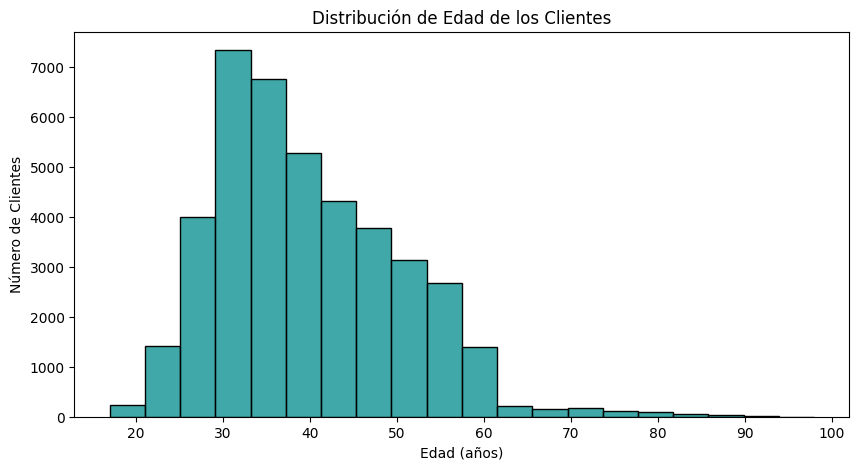

In [40]:
import matplotlib.pyplot as plt 
import seaborn as sns

# Voy a analizar la variable edad

plt.figure(figsize=(10, 5))  # Tamaño del gráfico
sns.histplot(df['age'], bins=20, color='darkcyan')  # Histograma simple

plt.title('Distribución de Edad de los Clientes')  # Título
plt.xlabel('Edad (años)')  # Etiqueta eje X
plt.ylabel('Número de Clientes');  # Etiqueta eje Y

plt.show()  # Mostrar gráfico

La mayoria de clientes se encuentra en edad de 30-40 años y hay muy pocas a partir de los 60

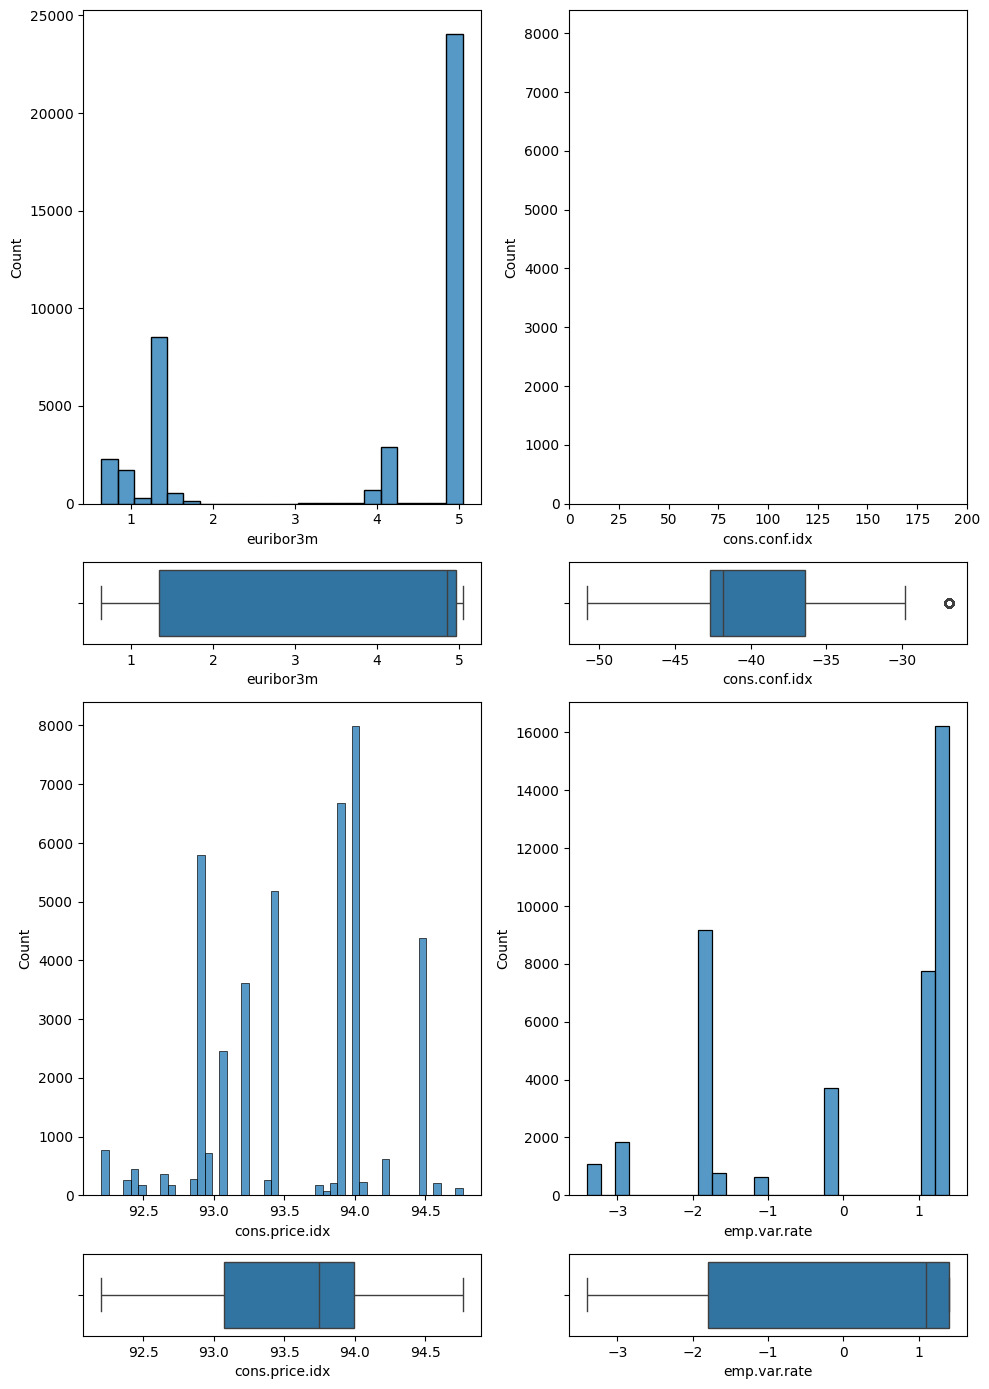

In [46]:
fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = df, x = "euribor3m")
sns.boxplot(ax = axis[1, 0], data = df, x = "euribor3m")

sns.histplot(ax = axis[0, 1], data = df, x = "cons.conf.idx").set_xlim(0, 200)
sns.boxplot(ax = axis[1, 1], data = df, x = "cons.conf.idx")

sns.histplot(ax = axis[2, 0], data = df, x = "cons.price.idx")
sns.boxplot(ax = axis[3, 0], data = df, x = "cons.price.idx")

sns.histplot(ax = axis[2,1], data = df, x = "emp.var.rate")
sns.boxplot(ax = axis[3, 1], data = df, x = "emp.var.rate")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Text(0.5, 1.0, 'Crédito en Mora')

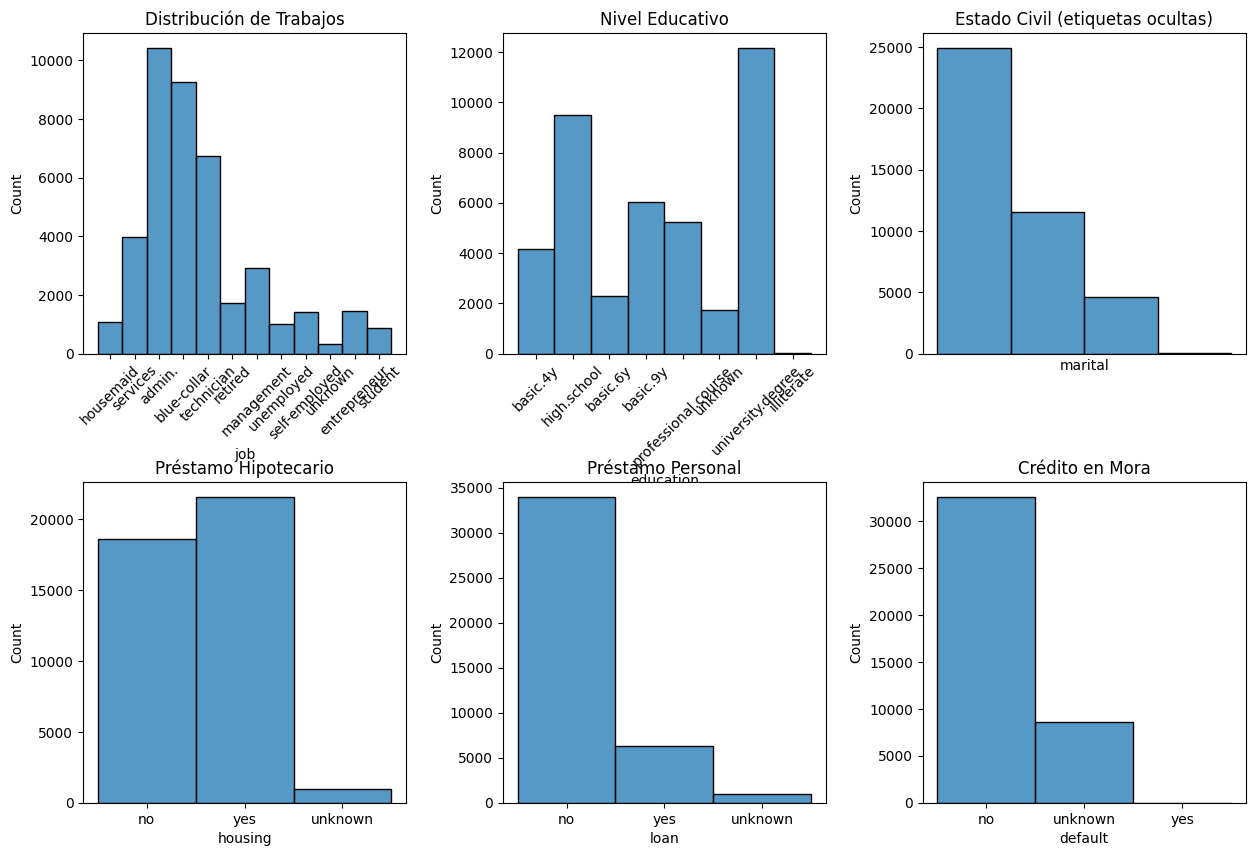

In [41]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Ajustar espacio entre subplots
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# 1. Job
sns.histplot(ax=axes[0,0], data=df, x="job")
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].set_title("Distribución de Trabajos")

# 2. Education
sns.histplot(ax=axes[0,1], data=df, x="education")
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].set_title("Nivel Educativo")

# 3. Marital (sin etiquetas en x)
sns.histplot(ax=axes[0,2], data=df, x="marital")
axes[0,2].set_xticks([])
axes[0,2].set_title("Estado Civil (etiquetas ocultas)")

# 4. Housing
sns.histplot(ax=axes[1,0], data=df, x="housing")
axes[1,0].set_title("Préstamo Hipotecario")

# 5. Loan
sns.histplot(ax=axes[1,1], data=df, x="loan")
axes[1,1].set_title("Préstamo Personal")

# 6. Default (¡no borrar este eje!)
sns.histplot(ax=axes[1,2], data=df, x="default")
axes[1,2].set_title("Crédito en Mora")

In [36]:
# Analisis de job

print(df["job"].describe())


count      41188
unique        12
top       admin.
freq       10422
Name: job, dtype: object


In [37]:
# Analisis de education

print(df["education"].describe())


count                 41188
unique                    8
top       university.degree
freq                  12168
Name: education, dtype: object


In [38]:
# Analisis casados

print(df["marital"].describe())

count       41188
unique          4
top       married
freq        24928
Name: marital, dtype: object


In [42]:
print(df["housing"].describe())

count     41188
unique        3
top         yes
freq      21576
Name: housing, dtype: object


In [44]:
print(df["loan"].describe())

count     41188
unique        3
top          no
freq      33950
Name: loan, dtype: object


In [45]:
print(df["default"].describe())

count     41188
unique        3
top          no
freq      32588
Name: default, dtype: object


ANALISIS CATEGORICO NUMERICO:

VOY A UTILIZAR LA VARIABLE EDAD CON TODAS LAS DEMAS CATEGORICAS


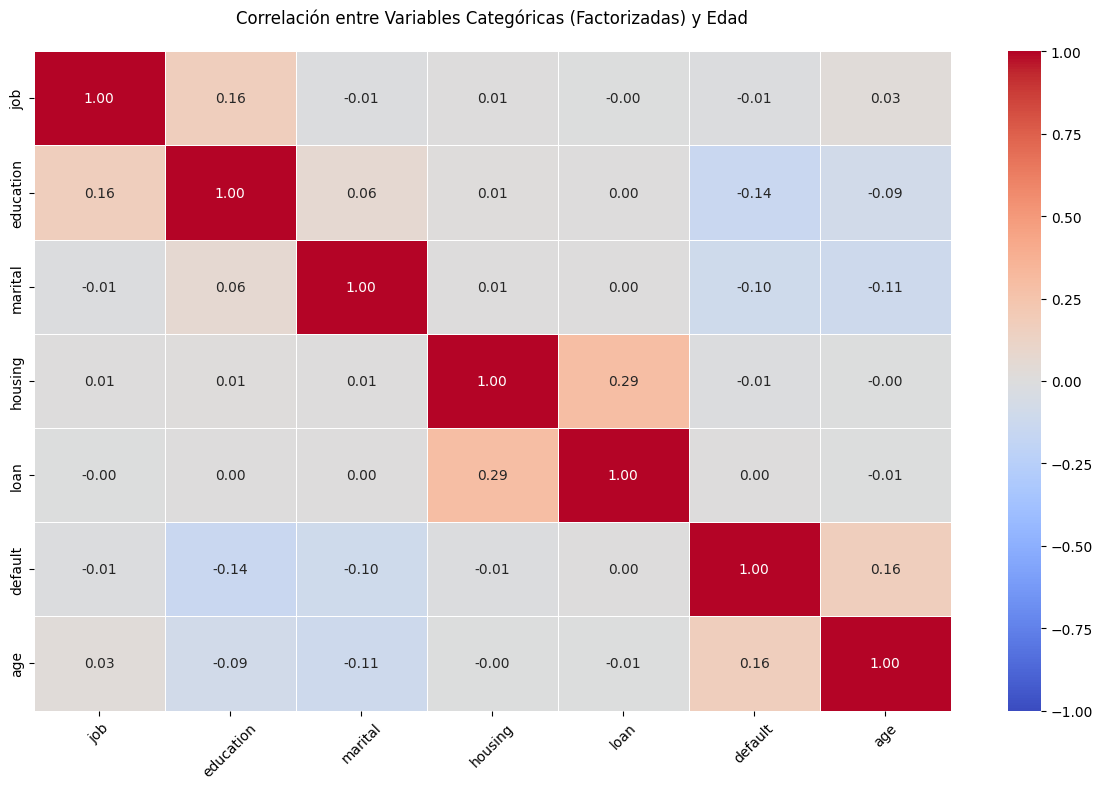

In [47]:
# Copiar el DataFrame original para no modificarlo
df_encoded = df.copy()

# Lista de variables categóricas a factorizar
categorical_vars = ["job", "education", "marital", "housing", "loan", "default"]

# Factorizar las variables categóricas (convertir a códigos numéricos)
for var in categorical_vars:
    df_encoded[var] = pd.factorize(df_encoded[var])[0]

# Crear matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(
    df_encoded[categorical_vars + ["age"]].corr(),  # Incluir age
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    linewidths=0.5
)

plt.title("Correlación entre Variables Categóricas (Factorizadas) y Edad", pad=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

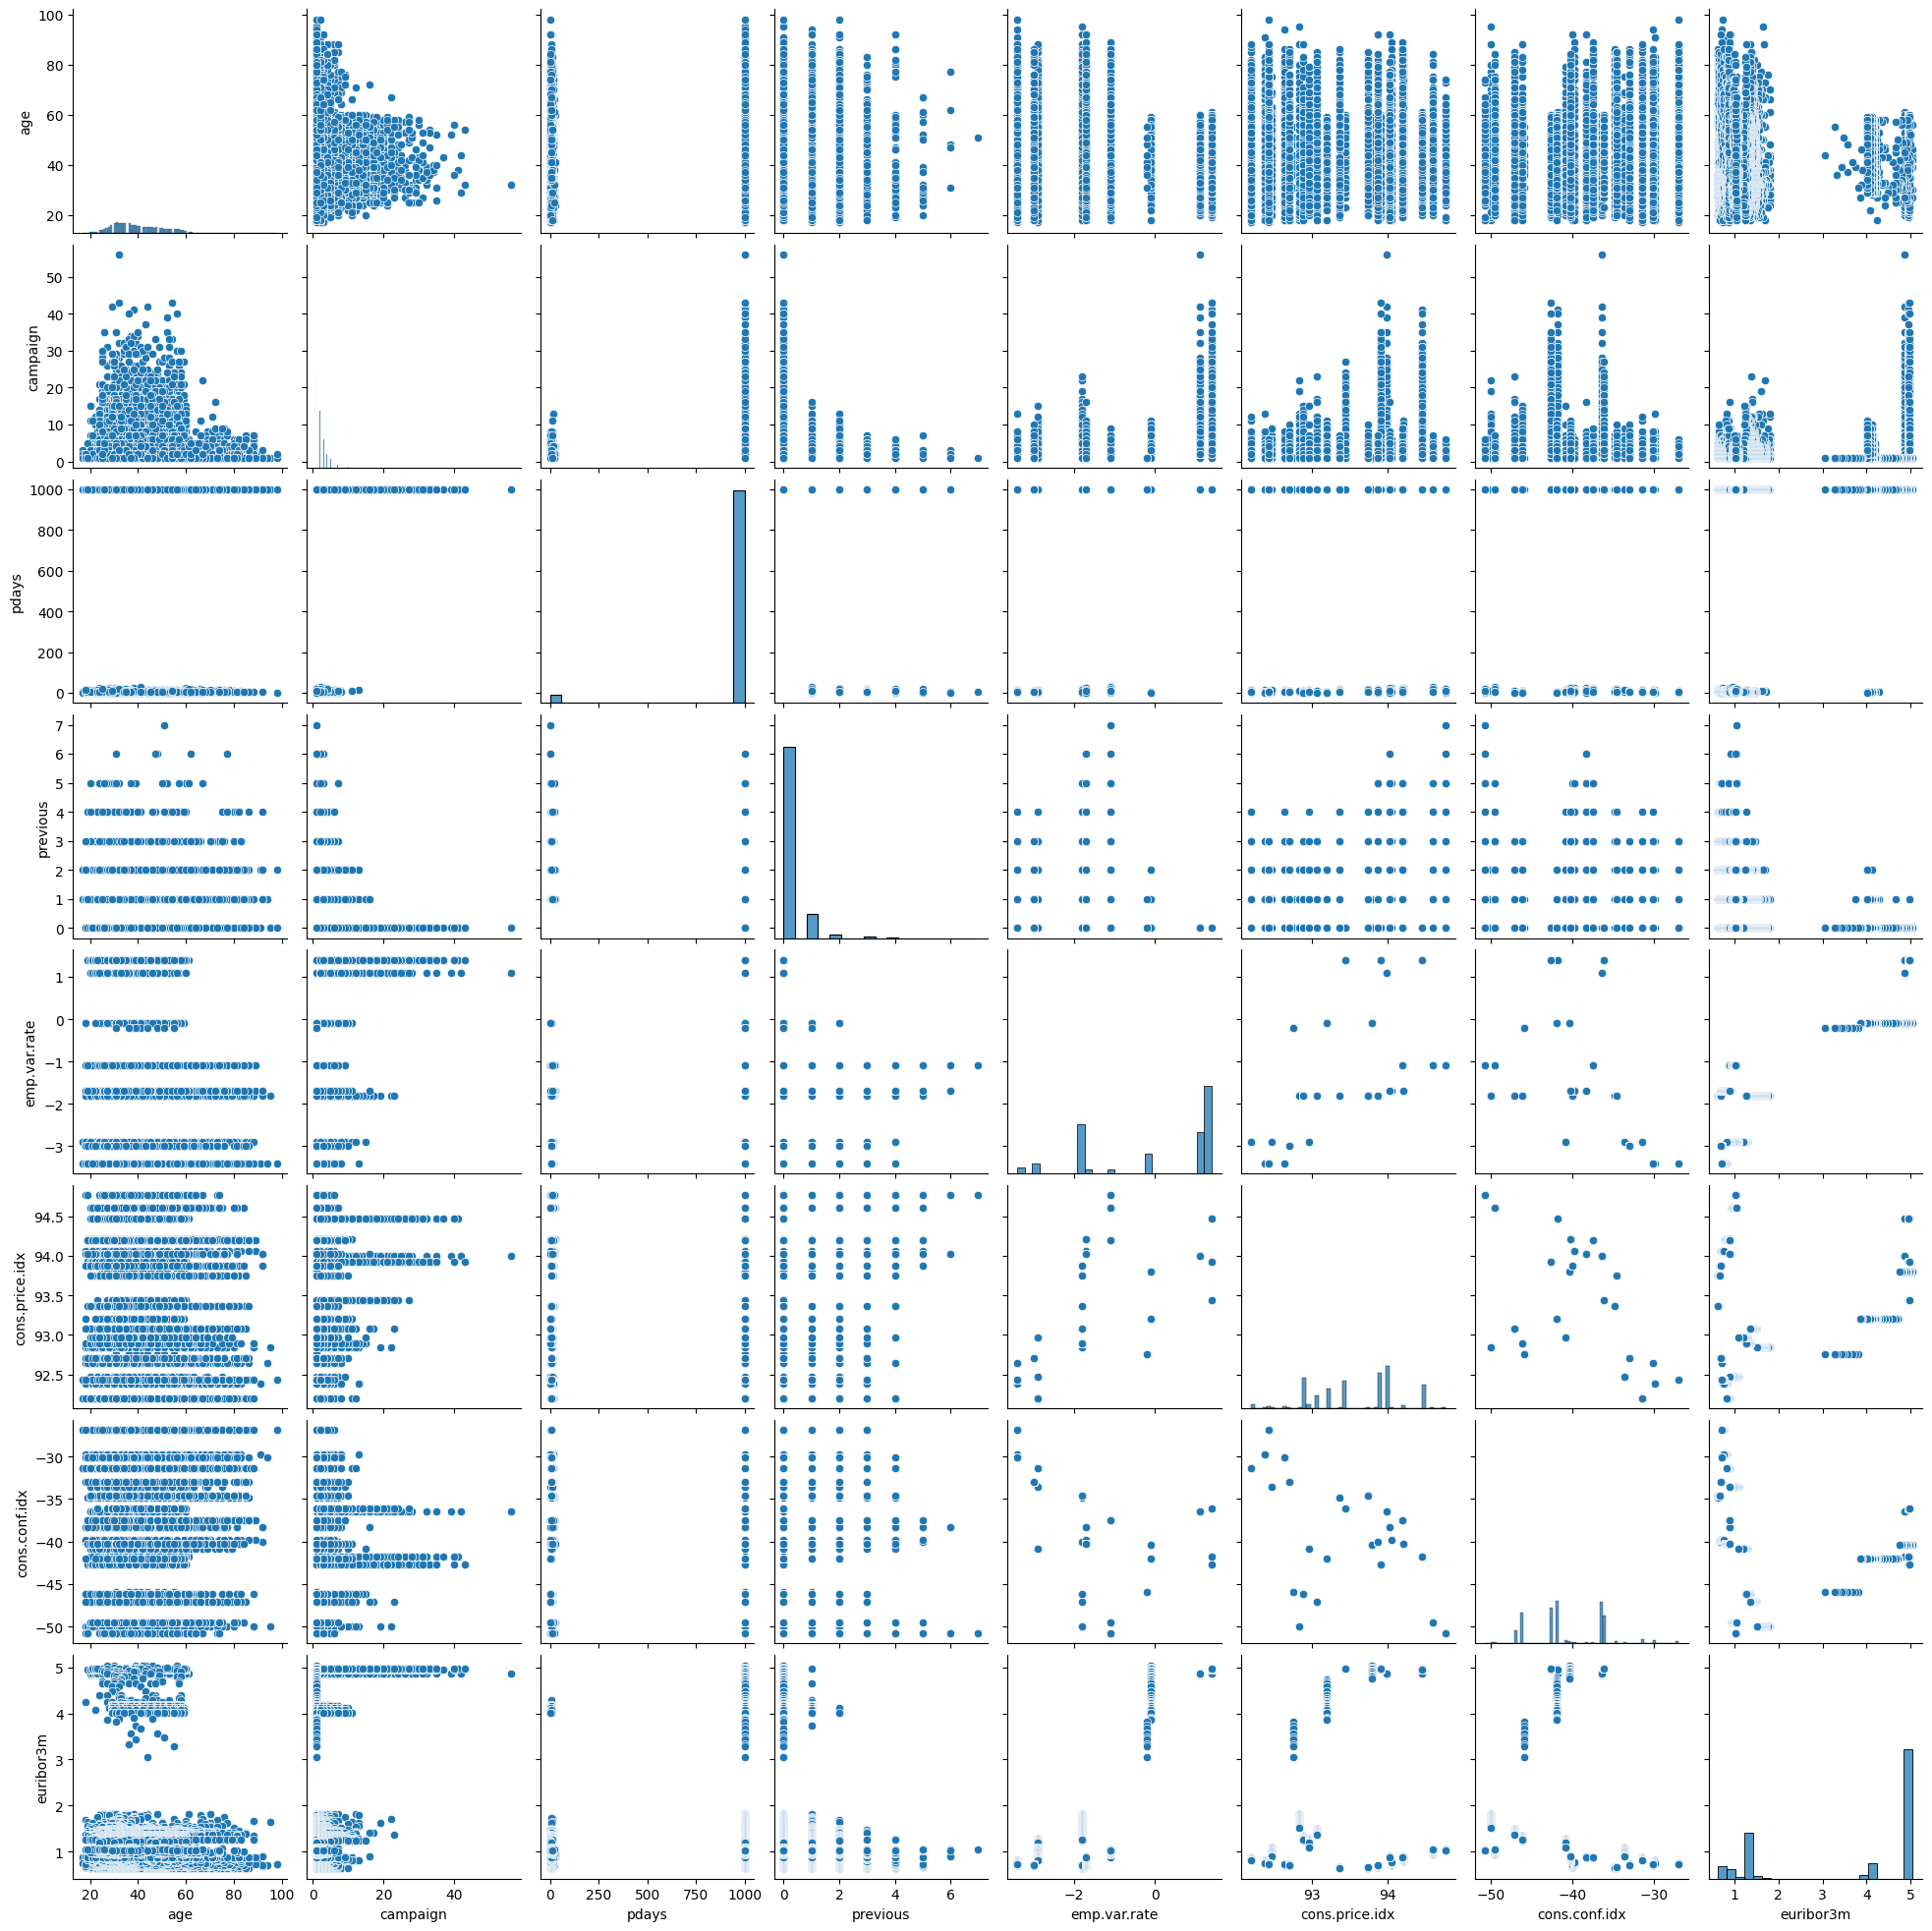

In [48]:
sns.pairplot(data = df)

PASO 2: INGENIERIA DE FUNCIONES

In [49]:
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000
